# Simulation und Modellierung WS17/18 - Uebung 06

### Aufgabe 1: Erzeugung und Multiplikation von Vektoren und Matrizen

Die Ableitung einer Funktion $f(x)$ an einer Stelle $x_0$ kann mit Hilfe eines geeigneten Differenzenquotienten approximiert werden. Es gilt

$$
    \lim_{h\to 0} \frac{f(x_0+h)-f(x_0-h)}{2h} = f'(x_0)
$$

- Definieren Sie eine `N`x`N` Matrix `D`, welche auf einen `N`x`1` Vektor `f` angewendet die symmetrische Differenz der Gitterpunkte $(Df)_i = f_{i+1}-f_{i-1}$ berechnet, wobei man periodische Randbedingungen $f_{i+N}=f_i$ annimmt. 
- berechnen Sie mit Hilfe dieser Matrix die erste und zweite Abbleitung der Funktion `f(x) = sin(x)` welche an `N` Gitterpunkten auf dem Intervall $[0,2\pi)$ gegeben sei.
- plotten Sie $f(x)$, $f'(x)$ und $f''(x)$ in ein Diagramm.

In [1]:
#Ausgabe der Plots im Notebook und laden von numpy und pylab (matplotlib+pyplot)
%matplotlib inline
import numpy as np 
from pylab import *

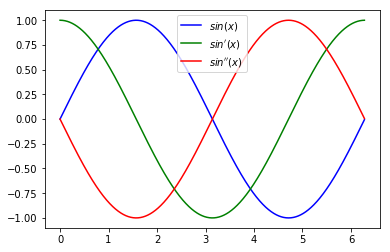

In [2]:
#define N, D, x, h, f, df  and d2f here

N = 1000                                   # Number der Gitterpunkte die wir benutzen um unsere Funktion
                                           # zu zeichnen.

x = linspace(0,2*pi,N,endpoint=False)      # Hier wird ein Vektor definiert mit N-Werten zwischen 0 und 2*Pi.
                                           # Die Variable endpoint=False besagt, dass der Wert 2*pi 
                                           # nicht zum Intervall gehört ([0,2pi), das Intervall ist also rechts offen)

f = sin(x)                                 # Hier wird die Funktion f als sin(x) definiert

h = abs(x[1]-x[0])                         # Sei h der Betrag der Differenz zweier Werte (hier des 1. und 2. x-Wertes)
                                           # des Vektors x

D = np.eye(N,k=1) - np.eye(N,k=-1)         # Hier wird die Matrix D definiert.
                                           # Die Matrix D zeichnet aus, dass auf der rechten Nebendiagonale 
                                           # positive 1-sen und auf der linken Nebendiagonale negative 1-sen sind.

D[0,N-1] = -1                              # Hier setzen wir die periodischen Randbedingungen
D[N-1,0] = 1

D = D/(2*h)                                # Hier teilen wir die Matrix-Elemente durch 2*h nach dem Differenzenquotienten

df = D.dot(f)                              # Hier wird die Matrix D auf die Funktion f angewandt und das Ergebnis
                                           # df genannt.

d2f = D.dot(df)                            # Hier wird die Matrix D auf df angewandt um die zweite Ableitung von
                                           # f zu bestimmen.


plot(x,f,'b',label='$sin(x)$')
plot(x,df,'g',label='$sin\'(x)$')
plot(x,d2f,'r',label="$sin''(x)$")
legend()
show()

### Aufgabe 2 : Der getriebene, gedaempfte harm. Oszillator

Der getriebene, gedaempfte harmonische Oszillator genuegt der Differentialgleichung

$$
    \ddot x + 2\gamma \dot x + \omega_0^2 x = A \cos(t)
$$
z.B. mit $\gamma=0.1$, $\omega_0=1.0$ und $A=1.0$.
- Schreiben Sie eine Funktion `limit_cycle(omega0=1.0,gamma=0.1,A=1.0,N=100)`, welche die lineare, inhomogene Differentialgleichung in `N` Zeitschritte ueber eine Periode der antreibenen Kraft diskretisiert und als lineares Gleichungssystem 
<br><br>
$$
    \frac{1}{4h^2}\textrm{D}^2\cdot \vec{x} + 2\gamma \frac{1}{2h}\textrm{D}\cdot \vec{x} + \omega_0^2 ~\mathbf{1}\cdot \vec{x} = A cos(\vec{t})
$$
loest. 

- Bestimmen und zeichnen Sie die Amplitude $B$ und die Phasenverschiebung $\varphi$ der Loesung $x = B \cos(t-\varphi)$ als Funktion von $\omega_0$. Hierfuer kann man die numpy Array Methode `x.argmax()` verwenden, welche den Index des maximalen Elements von `x` liefert.
- Zeichnen Sie die analytischen Loesungen
$$
\begin{eqnarray}
    B &=& \frac{A}{\sqrt{(\omega_0^2-1)^2+4\gamma^2}} \\
    \tan\varphi &=& \frac{-2\gamma}{\omega_0^2-1}
\end{eqnarray}
$$
ueber die von Ihnen numerisch gefundenen Loesungen als Funktion der Eigenfrequenz $\omega_0$ des harmonischen Oscillators. *Hinweis :* Die Methode `numpy.arctan2(y,x)` gibt den Winkel `alpha` mit `sin(alpha)=y` und `cos(alpha)=x` zurueck.

In [3]:
import numpy as np
def limit_cycle(omega0=1.0,gamma=0.1,A=1.0,N=100) :
    """ 
    Bestimmt die Loesung der inhomogenen linearen Differentialgleichung
    d^2x/dt^2 + 2 gamma dx/dt + omega0^2 x = A cos(t)
    auf dem in N Punkte diskretisierten periodischen Zeitintervall [0,2pi)
    """
    
    #your code goes here
    
    # Funktion erstellt einen Vektor x der Werte die der Differentialgleichung des getriebenen, gedaempften harmonischen Oszillator
    # genügen, in Abhängigkeit von omega0, gammma, A und N. Die Standardwerte sind dabei gesetzt als omega0=1.0,gamma=0.1,A=1.0 und N=100.
    
    t = linspace(0,2*pi,N,endpoint=False)     # macht einen Vektor mit N Werten für t von 0 bis 2*pi (ausschließlich 2*pi)
    h = abs(t[1]-t[0])                        # erstellt eine Variable h, die den Abstand zwischen den einzelnen Werten des Vektors t
    
    D = np.eye(N,k=1) - np.eye(N,k=-1)        # Die nächsten drei Zeilen erstellen die Ableitungsmatrix D wie in Aufgabe 1
    D[0,N-1] = -1                             # 
    D[N-1,0] = 1                              # 
    
    lgs = (1/(4*h**2)) * D.dot(D)  +  2 * gamma * (1/(2*h)) * D  +  omega0**2 * np.eye(N)  # Die linke Seite der Differentialgleichung in abhängigkeit von x
    b = A * cos(t)                            # Rechte Seite der Differentialgleichung, wie in der Aufgabe beschrieben
    
    x = np.linalg.solve(lgs,b)                # erstellt einen Vektor x der die Differentialgleichung löst
    
    return x                                  # gibt den Vektor x zurück

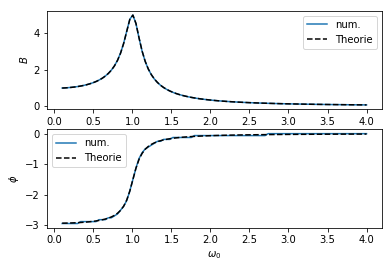

In [4]:
L=100                                                              # Anzahl diskreter Messwerte L
omega0 = np.linspace(0.1,4,L)                                      # erstellt ein array mit L Werten für omega0 von 0,1 bis 4
B = np.zeros(L)                                                    # erstellt ein array mit Nullen der Länge L und mit dem Namen B
phi = np.zeros(L)                                                  # erstellt ein array mit Nullen der Länge L und mit dem Nam0en phi
 
for n in range(0,L):                                               # in dieser For-Schleife werden numerisch Werte für B und phi in Abhängigkeit von omega0 berrechnet.
    x = limit_cycle(omega0=omega0[n],N=L)                          # erstellt mit der bereits definierten Funktion limit_cycle den Lösungsvektor für die Differentialgleichung
                                                                   # in Abhängigkeit von dem n-ten Wert für omega0
    B[n] = x[x.argmax()]                                           # berrechnet den maximalen x-wert für gegebenen n-ten Wert in omega0 und tut ihn an die n-te Stelle in B
    phi[n] = -x.argmax()*(2*pi/L)                                  # berrechnet die Phasenverschiebung für gegebenen n-ten Wert in omega0 und tut ihn an die n-te Stelle in phi
                                                                   # die Phasengeschwindigkeit ist hier (Referenz ist der cosinus): 0 - (t-wert bei der Amplitude B)
    
# bestimme B und phi numerisch fuer alle Werte in omega0
# definiere die theoretischen Werte Bth und phith

A = 1.0                                                            # zur berrechnung der theortischen Werte definieren wir uns zuerst unsere
gamma = 0.1                                                        # Werte für A und gamma (1.0 und 0.1)
Bth = np.zeros(L)                                                  # wie für B auch einen Vektor der Länge L für Bth
phith = np.zeros(L)                                                # wie für phi auch ein Vektor der Länge l für phith

for n in range(0,L):                                               # in dieser For-Schleife werden die theoretischen Werte für B und phi in abhängigkeit von omega0 ausgerechnet
    Bth[n] = A / (sqrt((omega0[n]**2 - 1)**2  +  4 * gamma**2))    # berechnet den n-ten Bth wert für den n-ten Wert von omega0 anhand der Formel die in der Aufgabenstellung beschrieben wurde
    phith[n] = np.arctan2(-2*gamma,omega0[n]**2 - 1)               # berechnet den n-ten phith wert für den n-ten Wert von omega0 anhand der Formel die in der Aufgabenstellung beschrieben wurde

subplot(2,1,1)                                                     # Alle folgenden Befehle sorgen dafür das B, phi, Bth und phith gegen omega0 geplottet werden
plot(omega0,B,label='num.')                                        # Im Ideal Fall sollten die Kurven von B und Bth sowie die von phi und phith übereinander liegen. 
plot(omega0,Bth,'k--',label='Theorie')
legend()
xlabel('$\omega_0$')
ylabel('$B$')


subplot(2,1,2)
plot(omega0,phi,label='num.')
plot(omega0,phith,'k--',label='Theorie')
legend()
xlabel('$\omega_0$')
ylabel('$\phi$')
show()